In [3]:
import pandas as pd
import generate_nnr_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from statistics import mean

In [4]:
def csv_to_data(directory, data_n):
    data = []
    
    for i in range(1, data_n+1):
        tmp_data = pd.read_csv(directory+'/s'+str(i)+'.csv', header=None).values
        data.append(tmp_data)
    
    return np.array(data)


def csv_to_aged_data(directory, aged_data_n):
    aged_data = []

    for i in range(1, aged_data_n+1):
        tmp_data = pd.read_csv(directory+'/s'+str(i)+'_aged.csv', header=None).values
        aged_data.append(tmp_data)
        
    return np.array(aged_data)


def generate_data(directory, data_n, aged_data_n):
    data = csv_to_data(directory, data_n)
    aged_data = csv_to_aged_data(directory, aged_data_n)
    
    return data, aged_data


def generate_residual_data(data_n, data):
    """
    測定値-推定値(周りの平均)
    残差を求めてデータ生成
    """
    tmp_x = [0, 1, 0, -1]
    tmp_y = [-1, 0, 1, 0]

    residual_data = np.zeros_like(data)

    for i in range(data_n):
        for j in range(data[i].shape[0]):
            for k in range(data[i].shape[1]):
                data_list = []
                for l in range(4):
                    next_y = j + tmp_y[l]
                    next_x = k + tmp_x[l]
                    if 0 <= next_y < 148 and 0 <= next_x < 33:
                        data_list.append(data[i, next_y, next_x])

                data_mean = mean(data_list)
                residual_data[i, j, k] = data[i, j, k] - data_mean

    return residual_data


def generate_nnr(data_n=50, aged_data_n=2):
    """
    残差集合のデータ生成
    """
    data, aged_data = generate_data('fresh_aged_ieice', data_n, aged_data_n)

    residual_data = generate_residual_data(data_n, data)
    aged_residual_data = generate_residual_data(aged_data_n, aged_data)

    return residual_data, aged_residual_data

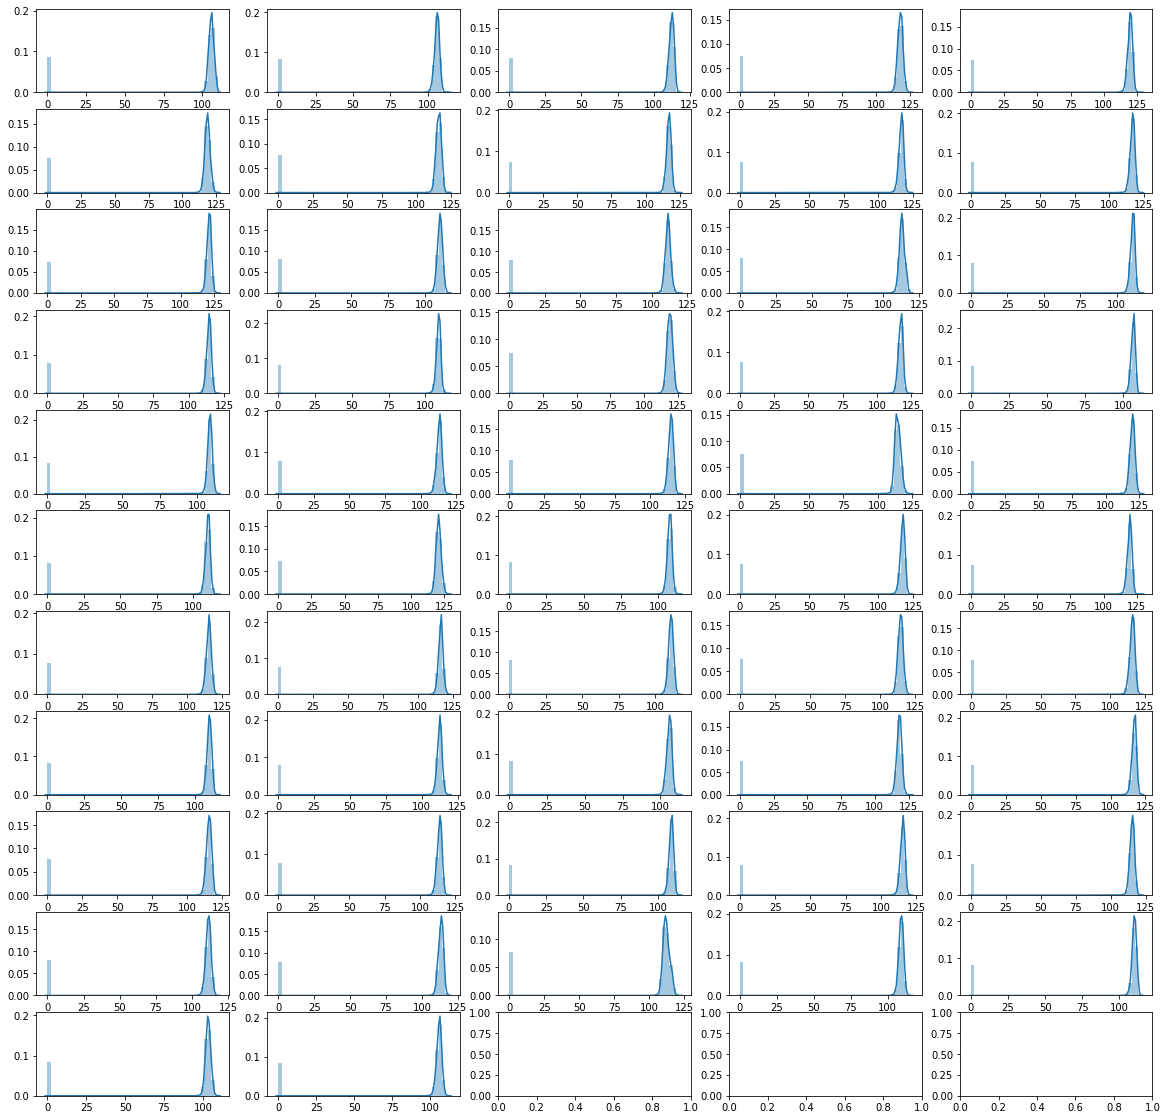

In [5]:
a, b = generate_data('fresh_aged_ieice', 50, 2)

data = []
for i in range(50):
    data.append(a[i].flatten())
    
for i in range(2):
    data.append(b[i].flatten())
    
data = np.array(data)

y = 11
x = 5
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

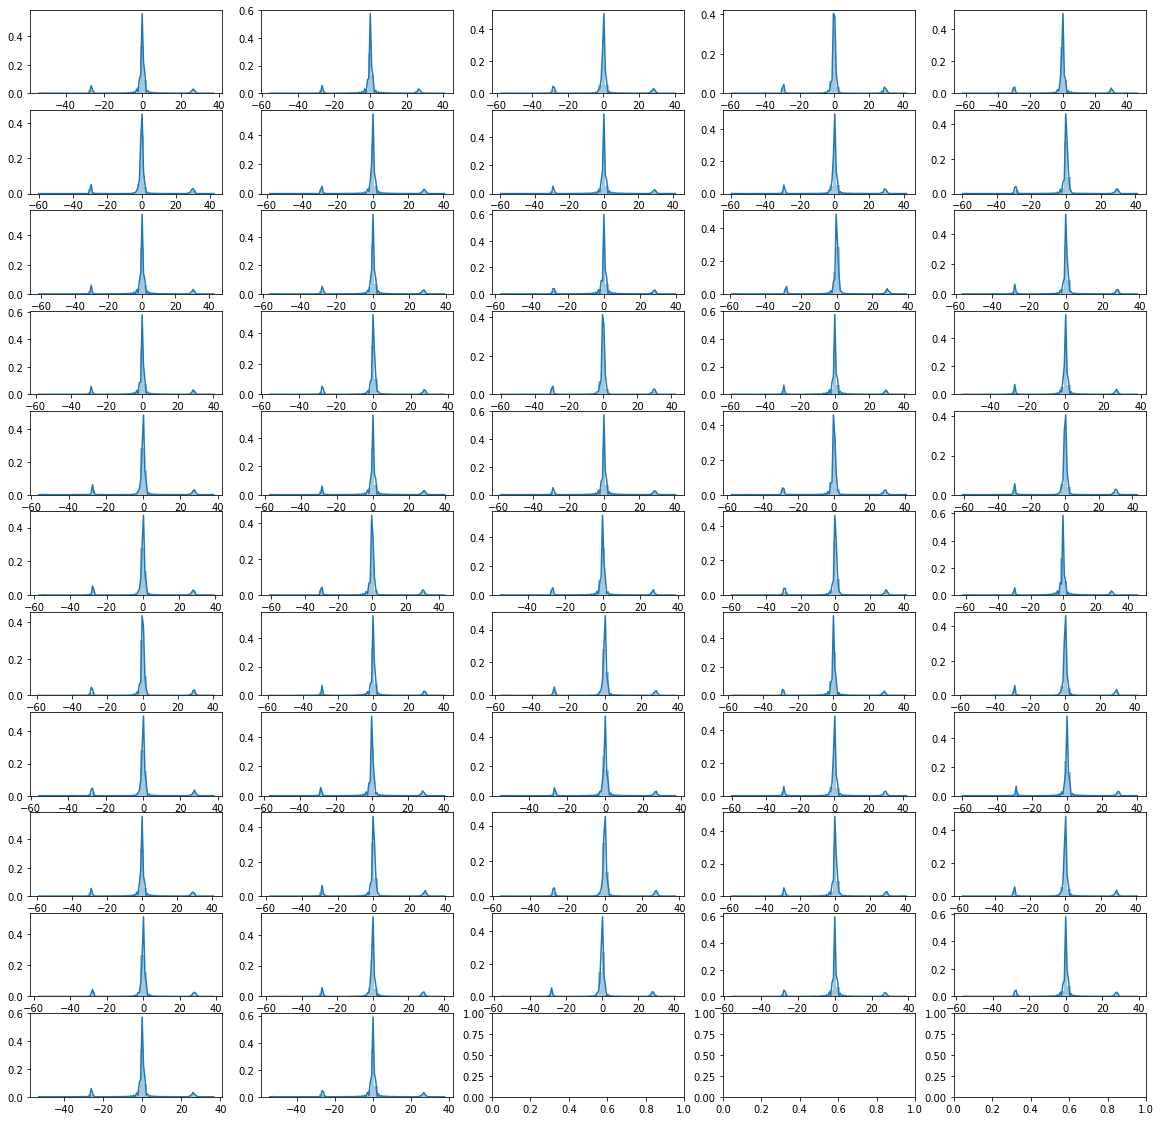

In [6]:
residual_data, aged_residual_data = generate_nnr()

data = []
for i in range(50):
    data.append(residual_data[i].flatten())
    
for i in range(2):
    data.append(aged_residual_data[i].flatten())
    
data = np.array(data)

y = 11
x = 5
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()

In [7]:
def generate_residual_data(data_n, data):
    """
    測定値-推定値(周りの平均)
    残差を求めてデータ生成
    """
    tmp_x = [0, 1, 0, -1]
    tmp_y = [-1, 0, 1, 0]

    residual_data = np.zeros_like(data)

    for i in range(data_n):
        for j in range(data[i].shape[0]):
            for k in range(data[i].shape[1]):
                data_list = []
                for l in range(4):
                    next_y = j + tmp_y[l]
                    next_x = k + tmp_x[l]
                    if 0 <= next_y < 148 and 0 <= next_x < 33:
                        data_list.append(data[i, next_y, next_x])

                data_mean = mean(data_list)
                residual_data[i, j, k] = np.abs(data[i, j, k] - data_mean)

    return residual_data


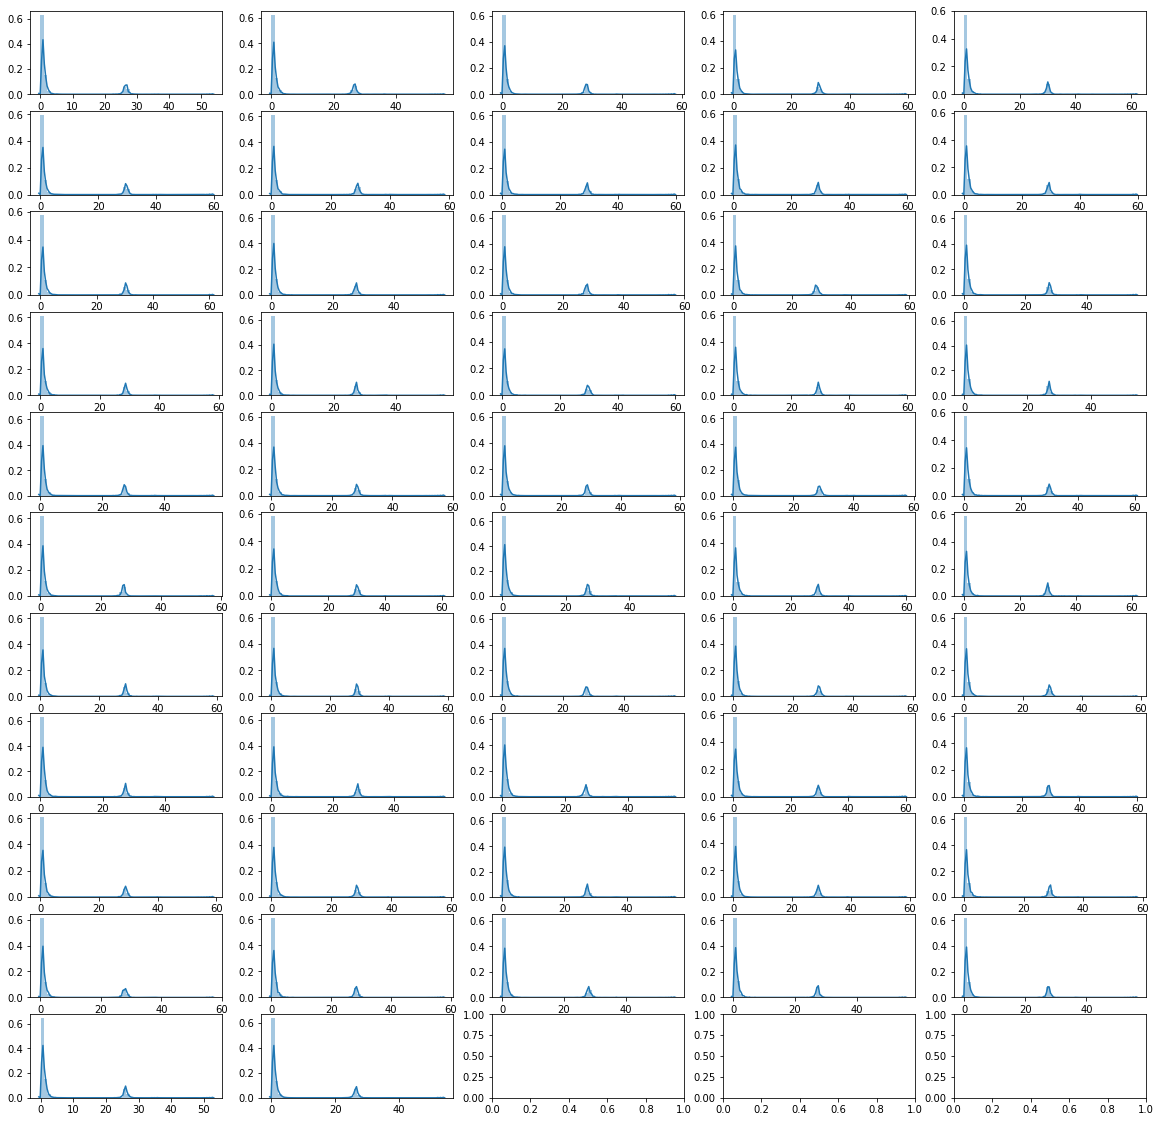

In [8]:
residual_data, aged_residual_data = generate_nnr()

data = []
for i in range(50):
    data.append(residual_data[i].flatten())
    
for i in range(2):
    data.append(aged_residual_data[i].flatten())
    
data = np.array(data)

y = 11
x = 5
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 52:
            break
        dummy = sns.distplot(data[count], ax=ax[i, j])
        count += 1
    if count >= 52:
        break

plt.show()
#file = open('new.csv', 'w')    #既存でないファイル名を作成してください
#w = csv.writer(file)
#w = w.writerows(data)
# 
#file.close()
#
#dataset = pd.read_csv("./new.csv", header=None)
#dataset

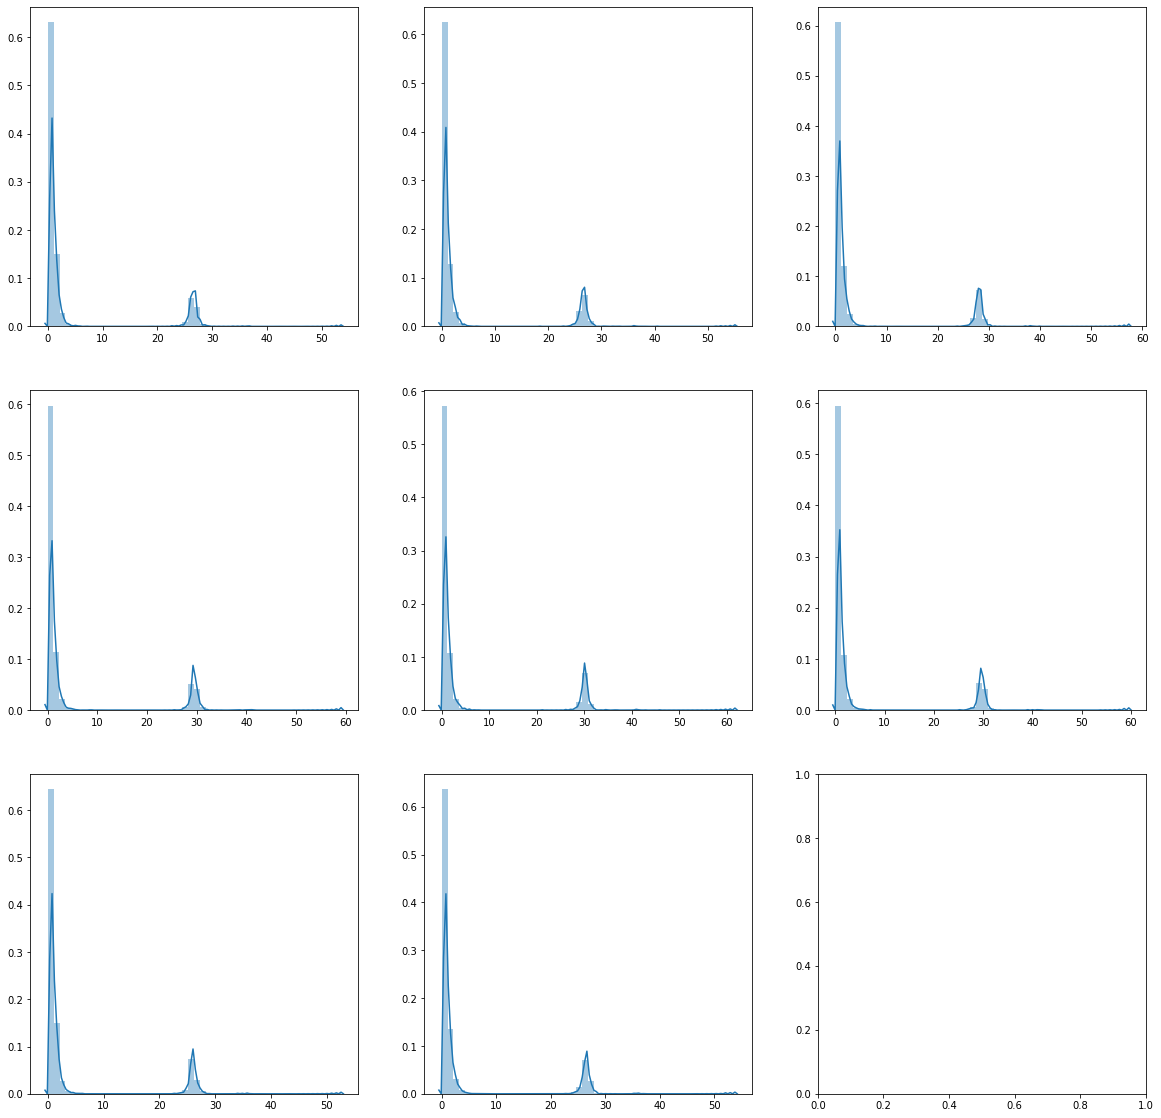

In [9]:
residual_data, aged_residual_data = generate_nnr()

data = []
for i in range(6):
    data.append(residual_data[i].flatten())
    
for i in range(2):
    data.append(aged_residual_data[i].flatten())
    
data = np.array(data)

y = 3
x = 3
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 8:
            break
        dummy = sns.distplot(data[count], ax=ax[i, j])
        count += 1
    if count >= 8:
        break

plt.show()

                      
#file = open('new.csv', 'w')    #既存でないファイル名を作成してください
#w = csv.writer(file)
#w = w.writerows(data)
# 
#file.close()
#
#dataset = pd.read_csv("./new.csv", header=None)
#dataset

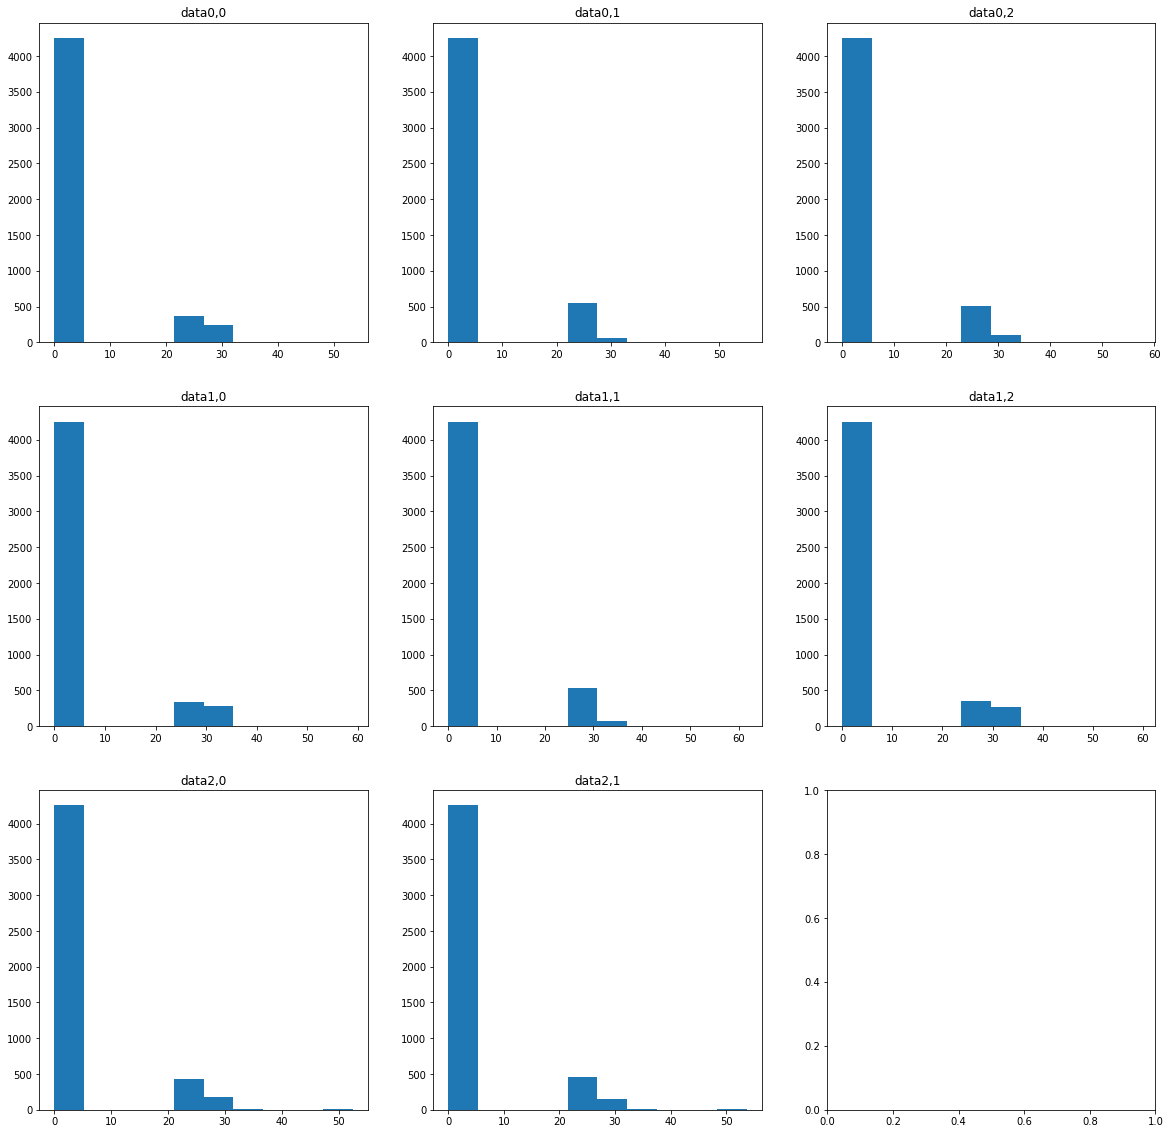

In [10]:
y = 3
x = 3
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 8:
            break
        ax[i, j].hist(data[count])
        ax[i, j].set_title(f'data{i},{j}')
        count += 1
    if count >= 8:
        break

plt.show()

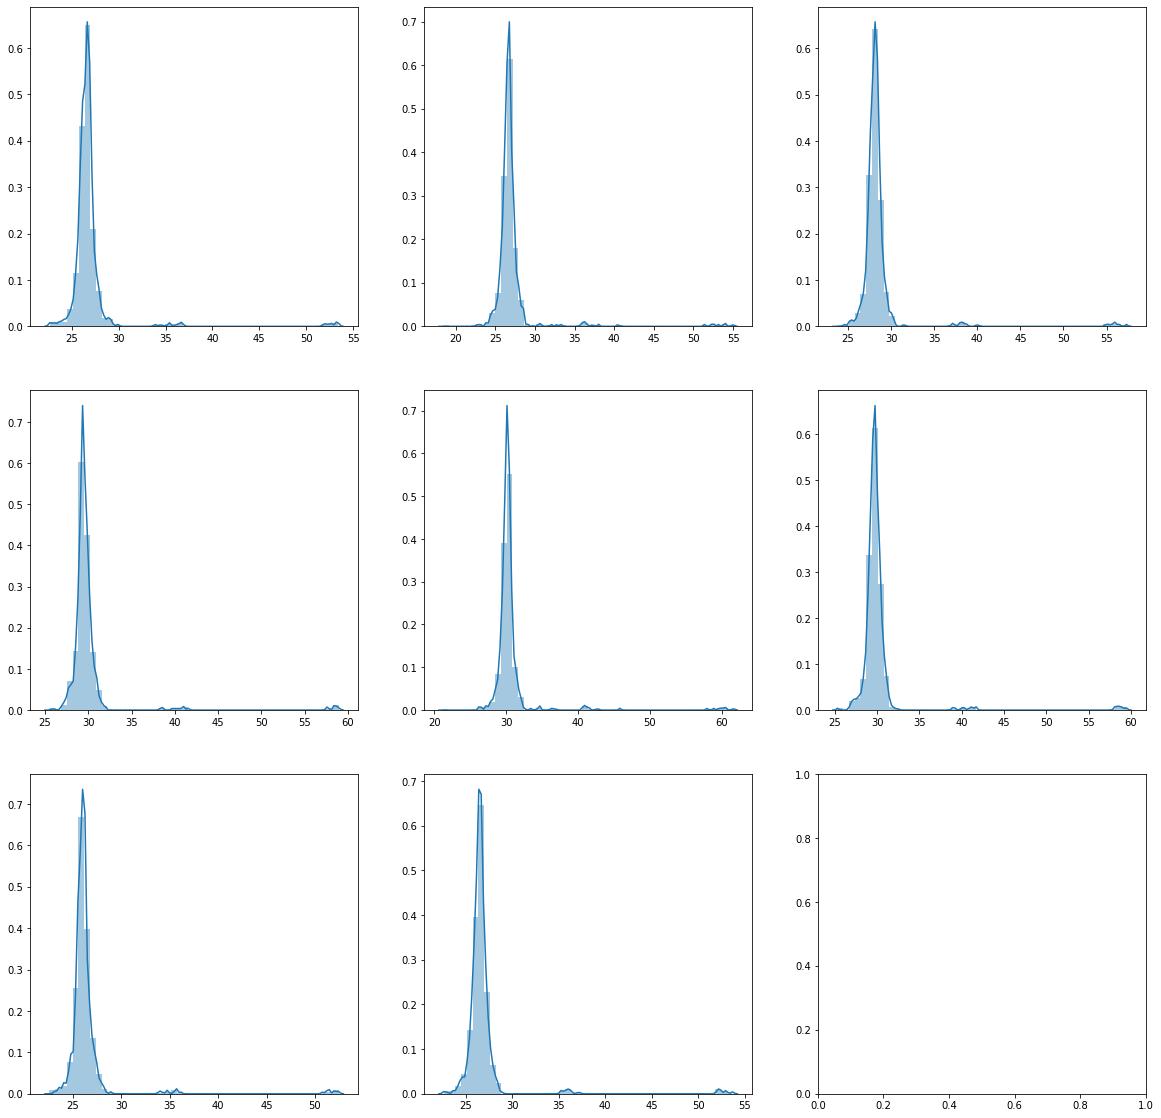

In [31]:
residual_data, aged_residual_data = generate_nnr()

#data = []
#for i in range(50):
#    data.append(residual_data[i].flatten())
#    
#for i in range(2):
#    data.append(aged_residual_data[i].flatten())
#    
#data = np.array(data)
#
#print(data.shape)
    

data = []
for i in range(6):
    data.append(residual_data[i].flatten())
    
for i in range(2):
    data.append(aged_residual_data[i].flatten())
    
data = np.array(data)

new_data = []    
for i in range(data.shape[0]):
    tmp = []
    for j in range(len(data[i])):
        if data[i, j] >= 15:
            tmp.append(data[i, j])
    new_data.append(tmp)


y = 3
x = 3
fig,ax = plt.subplots(y,x,figsize=(20,20))
count = 0
for i in range(y):
    for j in range(x):
        if count >= 8:
            break
        dummy = sns.distplot(new_data[count], ax=ax[i, j])
        count += 1
    if count >= 8:
        break

plt.show()